In [2]:
import ROOT,glob,math,os
from array import array

Welcome to JupyROOT 6.18/00


In [7]:
file1 = ROOT.TFile("test.root", 'recreate')
tree = ROOT.TTree("nominal", "Angle and trigger")

Theta_x  = array('f',[0])
Phi_1  = array('f',[0])
Phi_2  = array('f',[0])
Theta_phi_1  = array('f',[0])
Theta_phi_2  = array('f',[0])
#HLT_2mu4_bJpsimumu,HLT_mu6_mu4_bJpsimumu
#HLT_mu10_mu6_bJpsimumu or HLT_3mu6_bJpsi,HLT_3mu6_bJpsi
mc16a_trigger  = array('f',[0,0,0,0,0])
#HLT_3mu4_mu2noL1 or HLT_mu11_mu6_bJpsimumu or HLT_2mu6_bJpsimumu_*
mc16d_trigger  = array('f',[0,0,0])
#HLT_3mu4_bJpsi or HLT_mu11_mu6_bJpsimumu
mc16e_trigger  = array('f',[0,0])

tree.Branch("theta_x",  Theta_x,  'theta_x/F')
tree.Branch("phi_1",  Phi_1,  'phi_1/F')
tree.Branch("phi_2", Phi_2, 'phi_2/F')
tree.Branch("theta_phi_1",  Theta_phi_1,  'theta_phi_1/F')
tree.Branch("theta_phi_2", Theta_phi_2, 'theta_phi_2/F')
tree.Branch("mc16a_trigger",  mc16a_trigger,  'mc16a_trigger[5]/F')
tree.Branch("mc16d_trigger", mc16d_trigger, 'mc16d_trigger[3]/F')
tree.Branch("mc16e_trigger",  mc16e_trigger,  'mc16e_trigger[2]/F')

path="./signal/"
paths=glob.glob(path+"*root")
print(paths)
rootpath=paths[0]
f=ROOT.TFile(rootpath,"r")
hists=[]
for i in f.GetListOfKeys():
    hists.append(i.GetName())
t=f.Get("BPHY13")
N=t.GetEntries()
for i in range(100):
    t.GetEntry(i)
    mc16a_trigger[0]=t.pass_HLT_2mu4_bJpsimumu
    mc16a_trigger[1]=t.pass_HLT_mu6_mu4_bJpsimumu
    mc16a_trigger[2]=t.pass_HLT_mu10_mu6_bJpsimumu
    mc16a_trigger[3]=t.pass_HLT_3mu6_bJpsi
    mc16a_trigger[4]=t.pass_HLT_3mu6_bJpsi
    mc16d_trigger[0]=t.pass_HLT_3mu4_mu2noL1
    mc16d_trigger[1]=t.pass_HLT_mu11_mu6_bJpsimumu
    mc16d_trigger[2]=t.pass_HLT_2mu6_bJpsimumu_
    mc16e_trigger[0]=t.pass_HLT_3mu4_bJpsi
    mc16e_trigger[1]=t.pass_HLT_mu11_mu6_bJpsimumu
    muon_1=ROOT.TLorentzVector()
    muon_2=ROOT.TLorentzVector()
    muon_3=ROOT.TLorentzVector()
    muon_4=ROOT.TLorentzVector()
    jpsi_1=ROOT.TLorentzVector()
    jpsi_2=ROOT.TLorentzVector()
    x=ROOT.TLorentzVector()
    #muon_1.SetPtEtaPhiE(t.muo_rf_pt[0],t.muo_rf_eta[0],t.muo_rf_phi[0],t.muo_rf_E[0])
    #muon_2.SetPtEtaPhiE(t.muo_rf_pt[1],t.muo_rf_eta[1],t.muo_rf_phi[1],t.muo_rf_E[1])
    #muon_3.SetPtEtaPhiE(t.muo_rf_pt[2],t.muo_rf_eta[2],t.muo_rf_phi[2],t.muo_rf_E[2])
    #muon_4.SetPtEtaPhiE(t.muo_rf_pt[3],t.muo_rf_eta[3],t.muo_rf_phi[3],t.muo_rf_E[3])
    #jpsi_1.SetPxPyPzE(t.jpsi_1[0],t.jpsi_1[1],t.jpsi_1[2],t.jpsi_1[3])
    #jpsi_2.SetPxPyPzE(t.jpsi_2[0],t.jpsi_2[1],t.jpsi_2[2],t.jpsi_2[3])
    #x.jpsi_2.SetPxPyPzE(t.jpsi_2[0],t.jpsi_2[1],t.jpsi_2[2],t.jpsi_2[3])
    muon_1.SetPtEtaPhiE(t.muo_pt[0],t.muo_eta[0],t.muo_phi[0],t.muo_E[0])
    muon_2.SetPtEtaPhiE(t.muo_pt[1],t.muo_eta[1],t.muo_phi[1],t.muo_E[1])
    muon_3.SetPtEtaPhiE(t.muo_pt[2],t.muo_eta[2],t.muo_phi[2],t.muo_E[2])
    muon_4.SetPtEtaPhiE(t.muo_pt[3],t.muo_eta[3],t.muo_phi[3],t.muo_E[3])
    jpsi_1=muon_1+muon_2
    jpsi_2=muon_3+muon_4
    x=muon_1+muon_2+muon_3+muon_4
    
    #Compute phi1,phi2
    p_muon_1=ROOT.Math.Plane3D.Point() 
    p_muon_1.SetXYZ(muon_1.Px(),muon_1.Py(),muon_1.Pz())
    p_muon_2=ROOT.Math.Plane3D.Point() 
    p_muon_2.SetXYZ(muon_2.Px(),muon_2.Py(),muon_2.Pz())
    p_muon_3=ROOT.Math.Plane3D.Point() 
    p_muon_3.SetXYZ(muon_3.Px(),muon_3.Py(),muon_3.Pz())
    p_muon_4=ROOT.Math.Plane3D.Point() 
    p_muon_4.SetXYZ(muon_4.Px(),muon_4.Py(),muon_4.Pz())
    p_jpsi_1=ROOT.Math.Plane3D.Point() 
    p_jpsi_1.SetXYZ(jpsi_1.Px(),jpsi_1.Py(),jpsi_1.Pz())
    p_jpsi_2=ROOT.Math.Plane3D.Point() 
    p_jpsi_2.SetXYZ(jpsi_2.Px(),jpsi_2.Py(),jpsi_2.Pz())
    p_zero=ROOT.Math.Plane3D.Point() 
    p_zero.SetXYZ(0.0,0.0,0.0)
    muon_plane_12=ROOT.Math.Plane3D(p_zero,p_muon_1,p_muon_2)
    muon_plane_34=ROOT.Math.Plane3D(p_zero,p_muon_3,p_muon_4)
    jpsi_plane_12=ROOT.Math.Plane3D(p_zero,p_jpsi_1,p_jpsi_2)
    muon_nvector_12=muon_plane_12.Normal()
    muon_nvector_34=muon_plane_34.Normal()
    jpsi_nvector_12=jpsi_plane_12.Normal()
    
    muon_nvector3_12=ROOT.TVector3()
    muon_nvector3_12.SetXYZ(muon_nvector_12.X(),muon_nvector_12.Y(),muon_nvector_12.Z())
    muon_nvector3_34=ROOT.TVector3()
    muon_nvector3_34.SetXYZ(muon_nvector_34.X(),muon_nvector_34.Y(),muon_nvector_34.Z())
    jpsi_nvector3_12=ROOT.TVector3()
    jpsi_nvector3_12.SetXYZ(jpsi_nvector_12.X(),jpsi_nvector_12.Y(),jpsi_nvector_12.Z())
    phi_1=jpsi_nvector3_12.Angle(muon_nvector3_12)
    phi_2=jpsi_nvector3_12.Angle(muon_nvector3_34)  
        
    #Boost and compute theta_x
    boost=-(muon_1+muon_2+muon_3+muon_4).BoostVector()
    muon_1.Boost(boost)
    muon_2.Boost(boost)
    muon_3.Boost(boost)
    muon_4.Boost(boost)
    jpsi_1.Boost(boost)
    jpsi_2.Boost(boost)
    theta_x=x.Angle(jpsi_1.Vect())   
    
    #Boost and compute theta_phi_1
    boost_12=-(muon_1+muon_2).BoostVector()
    muon_1.Boost(boost_12)
    muon_2.Boost(boost_12)
    theta_phi_1=muon_1.Angle(jpsi_1.Vect())
    
    #Boost and compute theta_phi_2
    boost_34=-(muon_3+muon_4).BoostVector()
    muon_3.Boost(boost_34)
    muon_4.Boost(boost_34)
    theta_phi_2=muon_3.Angle(jpsi_2.Vect())
    
    Theta_x[0]=theta_x
    Phi_1[0]=phi_1
    Phi_2[0]=phi_2
    Theta_phi_1[0]=theta_phi_1
    Theta_phi_2[0]=theta_phi_2
    
    tree.Fill()
file1.Write()
file1.Close()
f.Close()

['./signal/sig_mc16a.root', './signal/sig_mc16e.root', './signal/sig_mc16d.root']


In [3]:
rootpath="./Reduce/sig_mc16a.root"
f=ROOT.TFile(rootpath,"r")
hists=[]
for i in f.GetListOfKeys():
    print(i.GetName())
    hists.append(i.GetName())
t=f.Get("nominal")
t.Show(79)
#for i in range(40,60):
#    t.Show(i)


nominal
======> EVENT:79
 theta_x         = 0.274388
 phi_1           = 2.00971
 phi_2           = 0.577273
 theta_phi_1     = 1.49512
 theta_phi_2     = 1.93218
 mc16a_trigger   = 1, 
                  1, 0, 0, 0
 mc16d_trigger   = 0, 
                  0, 0
 mc16e_trigger   = 0, 
                  0


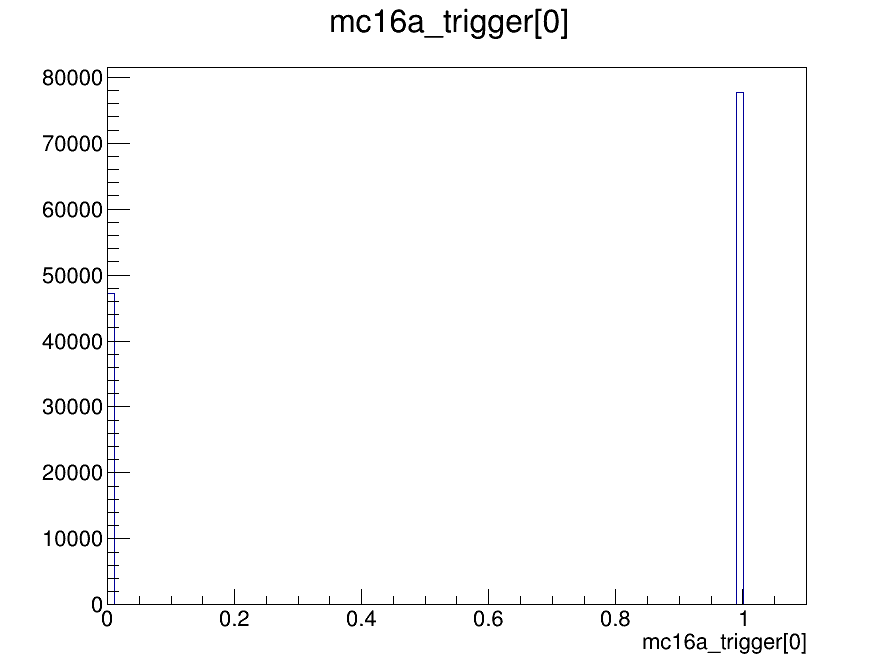

In [4]:
c1=ROOT.TCanvas("c1","c1",100,0,900,700)
c1.SetLeftMargin(0.12)
#c1.SetLogy()
ROOT.gStyle.SetOptStat(0)
t.Draw("mc16a_trigger[0]")
c1.Draw()